### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [3]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14 (1).csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [4]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [5]:
# Group by date and count the number of pickups
pickup_by_date = df.groupby(df['Date/Time'].dt.date).size()

# Find the date with the highest number of pickups
result = pickup_by_date.idxmax()
print("Date with the most number of Uber pickups:" , result)
print("Value:",pickup_by_date.max())

Date with the most number of Uber pickups: 2014-08-07
Value: 32759


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [7]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups


# Get the count of pickups on the highest date
print("Uber pickups were made on the date with the highest number of pickups:" ,pickup_by_date.max())


Uber pickups were made on the date with the highest number of pickups: 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [10]:
# Count the number of unique TLC base companies
print("Number of unique TLC base companies :",df['Base'].nunique())

Number of unique TLC base companies : 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [11]:
# Group by TLC base company and count the number of pickups
pickup_by_company =df.groupby('Base').size()
print(pickup_by_company.idxmax())

# Find the TLC base company with the highest number of pickups
result = pickup_by_company.idxmax()
print("TLC base company had the highest number of pickups:",result)

B02617
TLC base company had the highest number of pickups: B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [13]:
# Group by TLC base company and count the number of pickups
df.groupby('Base').size()

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [16]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_by_hour =df.groupby(df['Base']).size()

# Find the hour with the highest number of pickups
result = pickup_by_hour.idxmax()

print("Busiest time of day for Uber pickups(hours): ",result)

Busiest time of day for Uber pickups(hours):  B02617


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

Text(0.5, 1.0, 'Number of pickups over time')

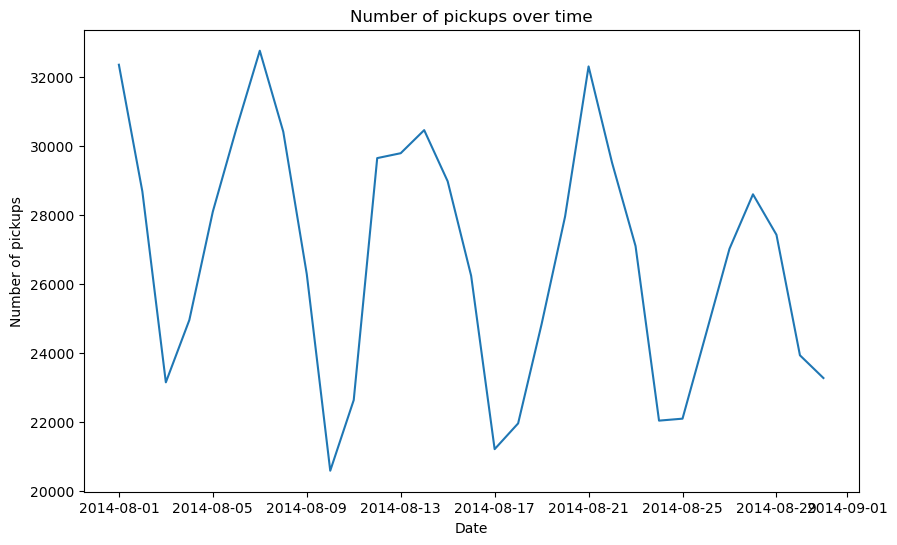

In [19]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_by_date =df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
pickup_by_date.plot(kind ='line' , figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Number of pickups")
plt.title("Number of pickups over time")

Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

Text(0.5, 1.0, 'Distribution of Uber pickups based on latitude and longitude')

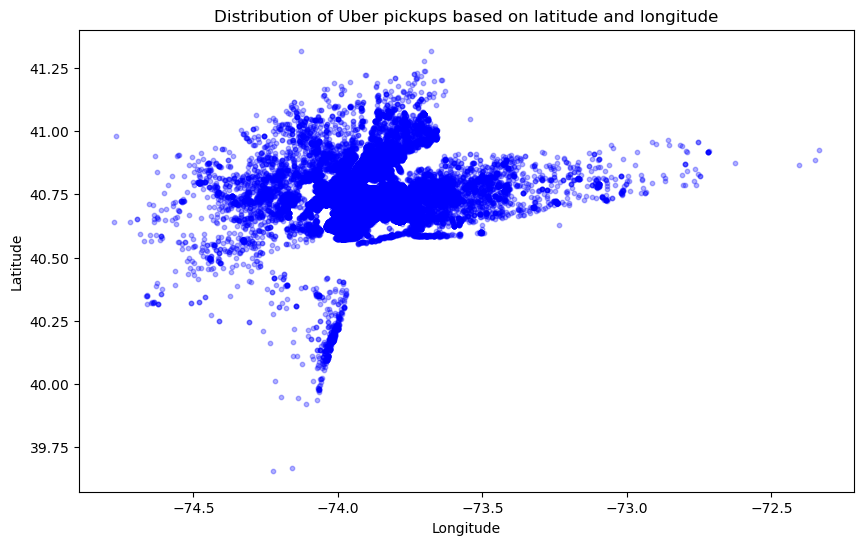

In [23]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize = (10,6))
plt.scatter(df['Lon'],df['Lat'], s = 10 , alpha = 0.3, color = 'blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of Uber pickups based on latitude and longitude")

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0.5, 1.0, 'Number of Uber Pickups by TLC Base Company')

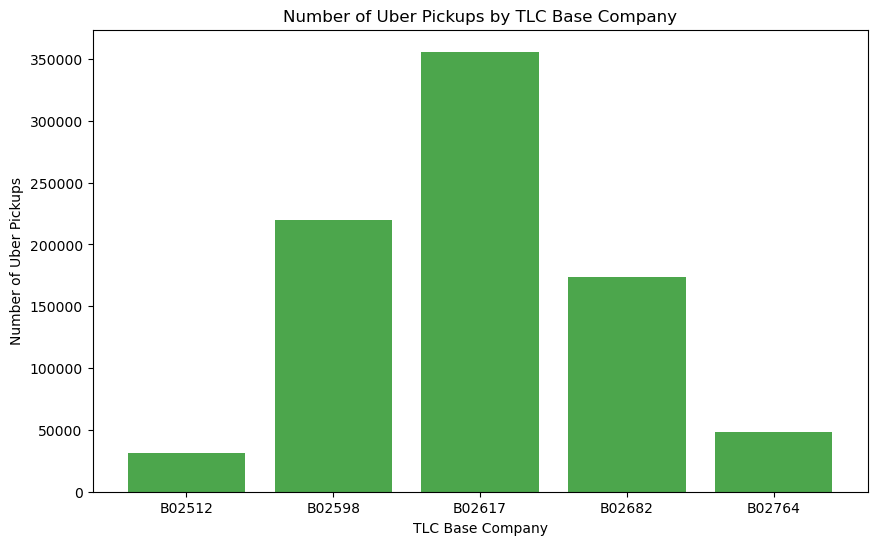

In [24]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickups_by_base = df.groupby('Base').size()
plt.figure(figsize = (10,6))
plt.bar(pickups_by_base.index , pickups_by_base.values , alpha = 0.7, color = 'Green')
plt.xlabel("TLC Base Company")
plt.ylabel("Number of Uber Pickups")
plt.title("Number of Uber Pickups by TLC Base Company")

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage distribution of Uber pickups for each day of the week')

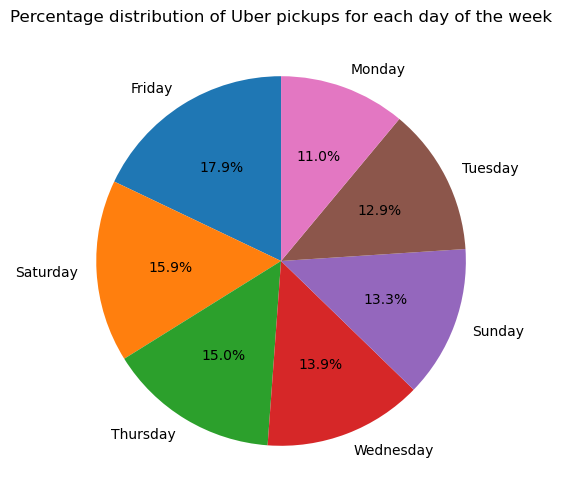

In [38]:
# Group by day of the week and count the number of pickups
pickups_by_day = df['Date/Time'].dt.day_name().value_counts()
#print(pickups_by_days)
plt.figure(figsize = (10,6))
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(x = pickups_by_day.values , labels = pickups_by_day.index ,autopct='%1.1f%%',startangle=90 )
plt.title('Percentage distribution of Uber pickups for each day of the week')